In [14]:
from instagrapi import Client
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from geodatasets import get_path
import plotly.express as px


In [ ]:
cl = Client()
cl.login(USERNAME, PASSWORD)

True

In [ ]:
hashtag_dump = cl.hashtag_medias_recent_v1(HASHTAG, 50)

In [26]:
tmp = []
for i in range(0,50):
    tmp.append(hashtag_dump[i].model_dump())

hashtag_posts = pd.DataFrame(tmp)

In [27]:
latlang_df = pd.DataFrame()
latlang_df["lat"] = hashtag_posts["location"].str.get("lat")
latlang_df["lng"] = hashtag_posts["location"].str.get("lng")

In [28]:
gdf = geopandas.GeoDataFrame(
    latlang_df, geometry=geopandas.points_from_xy(latlang_df.lng, latlang_df.lat), crs="EPSG:4326"
)

In [29]:
print(gdf)

         lat         lng                   geometry
0   2.894727  101.677270  POINT (101.67727 2.89473)
1   3.038467  101.767516  POINT (101.76752 3.03847)
2   2.716130  101.943414  POINT (101.94341 2.71613)
3   2.894934  101.676723  POINT (101.67672 2.89493)
4   2.977814  101.791172  POINT (101.79117 2.97781)
5        NaN         NaN                POINT EMPTY
6        NaN         NaN                POINT EMPTY
7        NaN         NaN                POINT EMPTY
8   2.716130  101.943414  POINT (101.94341 2.71613)
9        NaN         NaN                POINT EMPTY
10       NaN         NaN                POINT EMPTY
11  3.163334  101.695459  POINT (101.69546 3.16333)
12  3.128088  101.738272  POINT (101.73827 3.12809)
13  3.159151  101.701441  POINT (101.70144 3.15915)
14       NaN         NaN                POINT EMPTY
15       NaN         NaN                POINT EMPTY
16       NaN         NaN                POINT EMPTY
17  3.162122  101.692333  POINT (101.69233 3.16212)
18  2.716130

c:\Users\mohdf\anaconda\envs\work\Lib\site-packages\pyogrio\core.py:23: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


<Axes: >

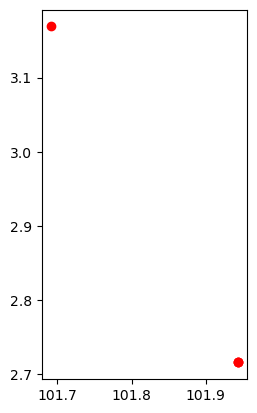

In [13]:
world = geopandas.read_file(get_path("naturalearth.land"))

# We can now plot our ``GeoDataFrame``.
gdf.plot(color="red")

# plt.show()  

In [34]:
fig = px.scatter_map(latlang_df, lat="lat", lon="lng", zoom=7)
fig.show()